In [28]:
# TA-Libによるファイナンシャルチャート
import datetime as dt
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
import talib as ta

In [52]:
# ta.get_function_groups()

In [53]:
start="2019-1-1"
end=dt.date.today()  # 現在の日付

In [54]:
end

datetime.date(2021, 10, 5)

In [191]:
# dataset: yahoo(Nikkei225)
yahoo_n225= pdr.DataReader('^N225', 'yahoo', start=start, end=end)  # S&P500(fred)

In [68]:
# ts_sp500= fred_sp500['SP500'].astype('f8')  # numpy配列のfloatに変換

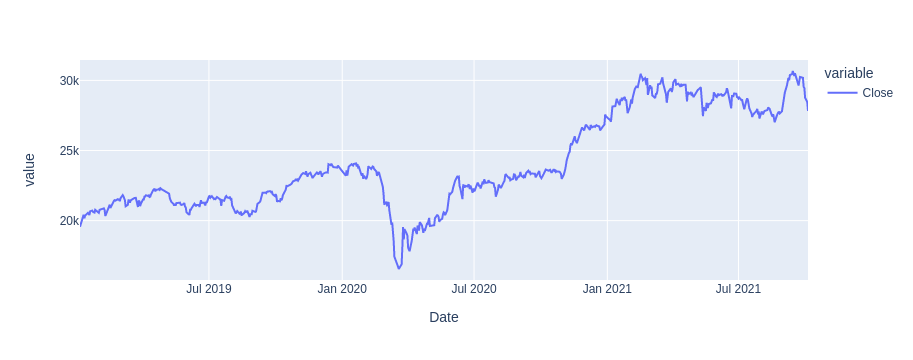

In [193]:
px.line(yahoo_n225['Close'])

In [194]:
yahoo_n225.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-04,19692.580078,19241.369141,19655.130859,19561.960938,91600000,19561.960938
2019-01-07,20266.220703,19920.800781,19944.609375,20038.970703,81500000,20038.970703
2019-01-08,20347.919922,20106.359375,20224.669922,20204.039062,86400000,20204.039062
2019-01-09,20494.349609,20331.199219,20366.300781,20427.060547,72800000,20427.060547
2019-01-10,20345.919922,20101.929688,20270.880859,20163.800781,73700000,20163.800781


In [210]:
yahoo_n225.index

DatetimeIndex(['2019-01-04', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18',
               ...
               '2021-09-21', '2021-09-22', '2021-09-24', '2021-09-27',
               '2021-09-28', '2021-09-29', '2021-09-30', '2021-10-01',
               '2021-10-04', '2021-10-05'],
              dtype='datetime64[ns]', name='Date', length=668, freq=None)

In [195]:
sma5= ta.SMA(yahoo_n225['Close'], timeperiod=5)  # 5daysSMA

sma25= ta.SMA(yahoo_n225['Close'], timeperiod=25)  # 25daysSMA

sma75= ta.SMA(yahoo_n225['Close'], timeperiod=75)  # 75daysSMA

In [197]:
macd, macdsignal, macdhist= ta.MACD(yahoo_n225['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [269]:
# go.Ohlc?

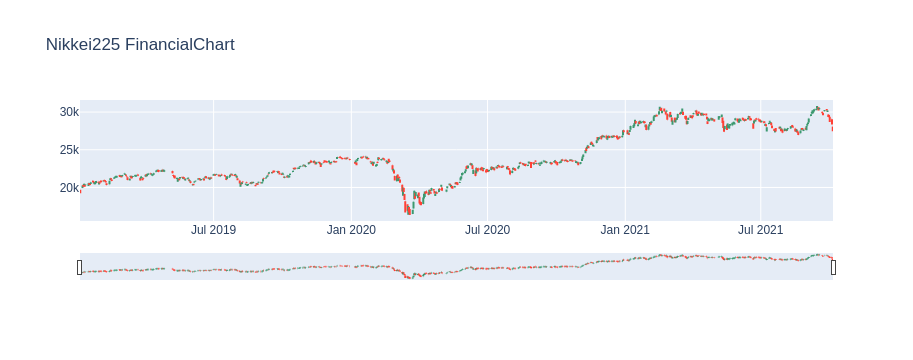

In [233]:
fig_rawdata= go.Figure(data=go.Ohlc(x=yahoo_n225.index,
                    open=yahoo_n225['Open'],
                    high=yahoo_n225['High'],
                    low=yahoo_n225['Low'],
                    close=yahoo_n225['Close']))
fig_rawdata.update_layout(title_text="Nikkei225 FinancialChart")

In [223]:
# figの定義
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

/data_01/script/script_python/.venv/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




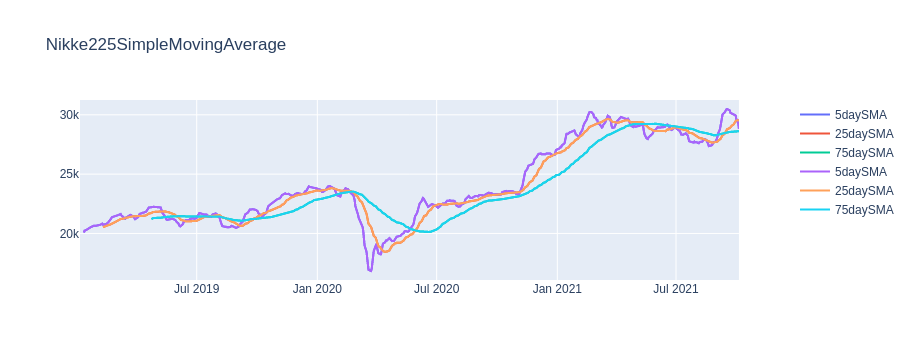

In [234]:
fig.add_trace(go.Line(x=sma5.index,  # 5daysSMA
                     y=sma5,
                     name="5daySMA"),
              row=1, col=1)
#             secondary_y=True)

fig.add_trace(go.Line(x=sma25.index,  # 25daysSMA
                     y=sma25,
                     name="25daySMA"),
              row=1, col=1)
#             secondary_y=True)

fig.add_trace(go.Line(x=sma75.index,  # 75daysSMA
                     y=sma75,
                     name="75daySMA"),
              row=1, col=1)
#             secondary_y=True)

fig.update_layout(title_text="Nikke225SimpleMovingAverage")

In [237]:
macd

Date
2019-01-04           NaN
2019-01-07           NaN
2019-01-08           NaN
2019-01-09           NaN
2019-01-10           NaN
                 ...    
2021-09-29    446.467118
2021-09-30    374.342340
2021-10-01    259.196475
2021-10-04    140.008640
2021-10-05     -4.647459
Length: 668, dtype: float64

In [235]:
# figの定義
fig_ta = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

/data_01/script/script_python/.venv/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




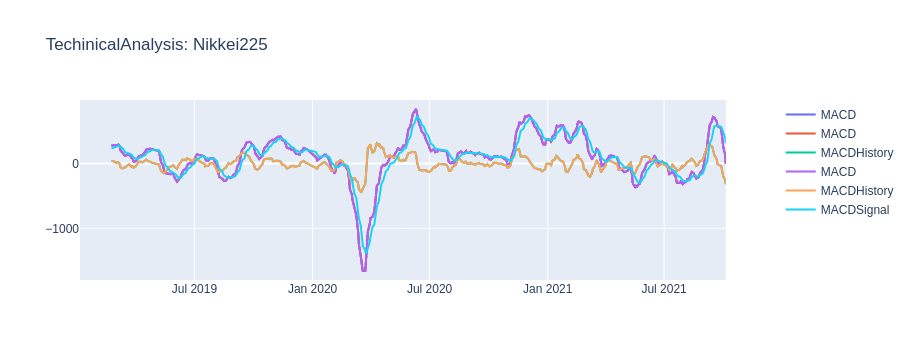

In [240]:
fig_ta.add_trace(go.Line(x=macd.index,  # MACD
                     y=macd,
                     name="MACD"),
              row=1, col=1)

fig_ta.add_trace(go.Line(x=macdhist.index,  # MACDhis
                     y=macdhist,
                     name="MACDHistory"),
              row=1, col=1)

fig_ta.add_trace(go.Line(x=macdsignal.index,  # MACDsignal
                     y=macdsignal,
                     name="MACDSignal"),
              row=1, col=1)

fig_ta.update_layout(title_text="TechinicalAnalysis: Nikkei225")

In [261]:
# MedianPrice
median_price= ta.MEDPRICE(high=yahoo_n225['High'], low=yahoo_n225['Low'])

In [263]:
# AveragePrice
averave_price= ta.AVGPRICE(open=yahoo_n225['Open'], high=yahoo_n225['High'], low=yahoo_n225['Low'],
                          close=yahoo_n225['Close'])

In [264]:
# figの定義
fig_avgprice = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

/data_01/script/script_python/.venv/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




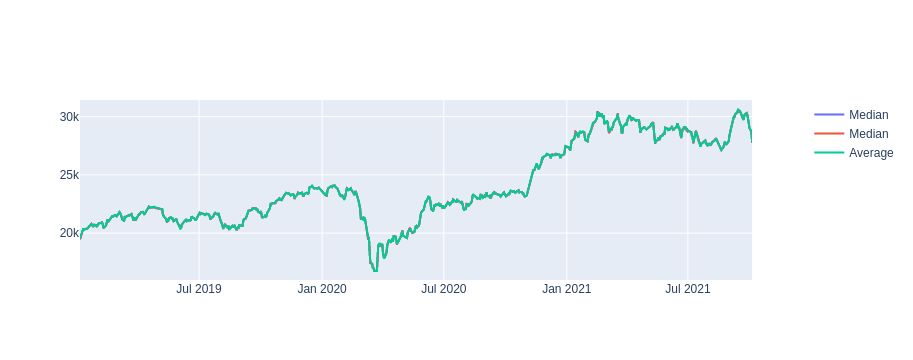

In [266]:
fig_avgprice.add_trace(go.Line(x=median_price.index,  # Median
                     y=median_price,
                     name="Median"),
              row=1, col=1)

fig_avgprice.add_trace(go.Line(x=averave_price.index,  # Average
                     y=averave_price,
                     name="Average"),
              row=1, col=1)

fig_avgprice.update_layout()

In [289]:
# Bollinger Bands
"""
upperband, middleband, lowerband = BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
"""
upperband, middleband, lowerband = ta.BBANDS(yahoo_n225['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

In [296]:
# EMA
"""
real = EMA(close, timeperiod=30)
"""
ema_30 = ta.EMA(yahoo_n225['Close'], timeperiod=30)

In [291]:
# figの定義
fig_bbands = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

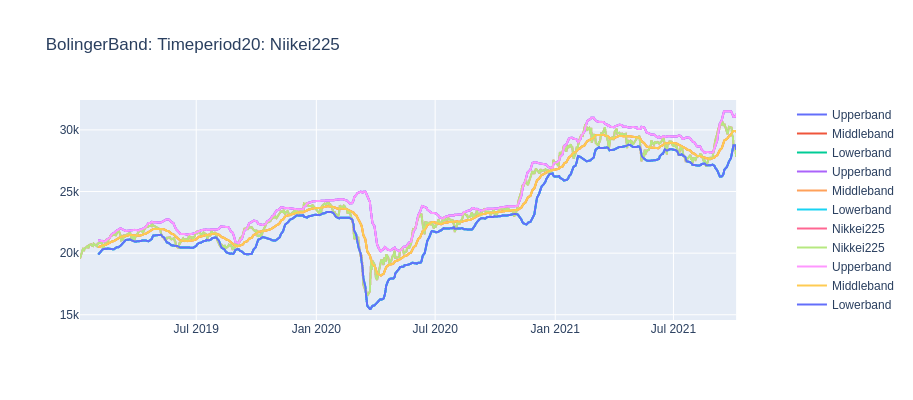

In [295]:
fig_bbands.add_trace(go.Line(x=yahoo_n225.index,
                             y=yahoo_n225['Close'],
                             name="Nikkei225"),
                             row=1, col=1)

fig_bbands.add_trace(go.Line(x=upperband.index,  # UpperBand
                     y=upperband,
                     name="Upperband"),
              row=1, col=1)

fig_bbands.add_trace(go.Line(x=middleband.index,  # MiddleBand
                     y=middleband,
                     name="Middleband"),
              row=1, col=1)

fig_bbands.add_trace(go.Line(x=lowerband.index,  # Lowerband
                     y=lowerband,
                     name="Lowerband"),
              row=1, col=1)

fig_bbands.update_layout(title_text="BolingerBand: Timeperiod20: Niikei225", width=800, height=400)

In [297]:
# figの定義
fig_ma = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

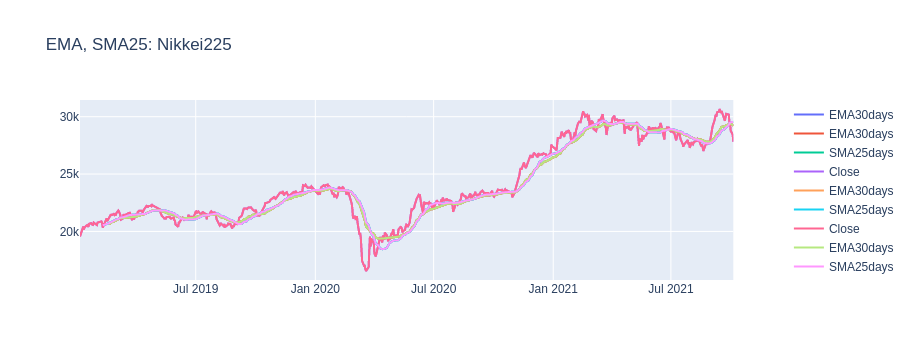

In [301]:
fig_ma.add_trace(go.Line(x=yahoo_n225.index,  # Close
                     y=yahoo_n225['Close'],
                     name="Close"),
              row=1, col=1)

fig_ma.add_trace(go.Line(x=ema_30.index,  # EMA
                     y=ema_30,
                     name="EMA30days"),
              row=1, col=1)

fig_ma.add_trace(go.Line(x=sma25.index,  # SMA25
                     y=sma25,
                     name="SMA25days"),
              row=1, col=1)

fig_ma.update_layout(title_text="EMA, SMA25: Nikkei225")

In [268]:
# ta.TSF?

In [267]:
# ta.TSF(yahoo_n225['Close'], timeperiod=14).plot()

In [259]:
"""
Beta

# foresast
n225_forecast7= ta.TSF(yahoo_n225['Close'], timeperiod=7)

# foresast
n225_forecast14= ta.TSF(yahoo_n225['Close'], timeperiod=14)

# foresast
n225_forecast30= ta.TSF(yahoo_n225['Close'], timeperiod=30)

# fig
fig_tsf = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

fig_tsf.add_trace(go.Line(x=n225_forecast7.index,  # 5daysSMA
                     y=n225_forecast7,
                     name="7daysForecast"),
              row=1, col=1)

fig_tsf.add_trace(go.Line(x=n225_forecast14.index,  # 5daysSMA
                     y=n225_forecast14,
                     name="14daysForecast"),
              row=1, col=1)

fig_tsf.add_trace(go.Line(x=n225_forecast30.index,  # 5daysSMA
                     y=n225_forecast30,
                     name="30daysForecast"),
              row=1, col=1)

fig_tsf.update_layout(title_text="TimeseriesForecast: Nikkei225")

"""

'\nBeta\n\n# foresast\nn225_forecast7= ta.TSF(yahoo_n225[\'Close\'], timeperiod=7)\n\n# foresast\nn225_forecast14= ta.TSF(yahoo_n225[\'Close\'], timeperiod=14)\n\n# foresast\nn225_forecast30= ta.TSF(yahoo_n225[\'Close\'], timeperiod=30)\n\n# fig\nfig_tsf = make_subplots(rows=1, cols=1, specs=[[{\'secondary_y\': True}]])\n\nfig_tsf.add_trace(go.Line(x=n225_forecast7.index,  # 5daysSMA\n                     y=n225_forecast7,\n                     name="7daysForecast"),\n              row=1, col=1)\n\nfig_tsf.add_trace(go.Line(x=n225_forecast14.index,  # 5daysSMA\n                     y=n225_forecast14,\n                     name="14daysForecast"),\n              row=1, col=1)\n\nfig_tsf.add_trace(go.Line(x=n225_forecast30.index,  # 5daysSMA\n                     y=n225_forecast30,\n                     name="30daysForecast"),\n              row=1, col=1)\n\nfig_tsf.update_layout(title_text="TimeseriesForecast: Nikkei225")\n\n'